In [4]:
text = "평생 살 것처럼 꿈을 꾸어라. 그리고 내일 죽을 것처럼 오늘을 살아라."

tokens = [x for x in text.split(' ')]
print(tokens,'\n')
unique = set(tokens)
unique = list(unique)
print(unique,'\n')
token2idx = {}
for i in range(len(unique)):
  token2idx[unique[i]] = i
print(token2idx, '\n')
encode = [token2idx[x] for x in tokens]
encode

['평생', '살', '것처럼', '꿈을', '꾸어라.', '그리고', '내일', '죽을', '것처럼', '오늘을', '살아라.'] 

['것처럼', '죽을', '오늘을', '살', '살아라.', '평생', '꿈을', '그리고', '꾸어라.', '내일'] 

{'것처럼': 0, '죽을': 1, '오늘을': 2, '살': 3, '살아라.': 4, '평생': 5, '꿈을': 6, '그리고': 7, '꾸어라.': 8, '내일': 9} 



[5, 3, 0, 6, 8, 7, 9, 1, 0, 2, 4]

[과제] 상기 작업을 keras를 이용하여 수행하세요.

imdb 데이터 셋을 가져와서 다음 사항을 기준으로 감정분석을 수행하세요.
- num_words = 1000, max_len=100

In [5]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Flatten

num_words = 1000
(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words=num_words)

17473536/17464789 [==============================] - 0s 0us/step


In [7]:
for i in range(10):
  if y_train[i] == 0:
    label = '부정'
  else:
    label = '긍정'
  print(f'{x_train[i]}\n{label}')

[1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
긍정
[1, 194, 2, 194, 2, 78, 228, 5, 6, 2, 2, 2, 134, 26, 4, 715, 8, 118, 2, 14, 394, 20, 13, 119, 954, 189, 102, 5, 207, 110, 2, 2

In [9]:
# pad_sequence() : 데이터의 maxlen 보다 길면 데이터를 자름
from tensorflow.keras.preprocessing.sequence import pad_sequences 
max_len = 100

pad_x_train = pad_sequences(x_train, maxlen=max_len, padding='pre') # 앞에서부터 패딩을 채움
pad_x_test = pad_sequences(x_test,maxlen=max_len, padding='pre')

In [11]:
model = Sequential()

model.add(Embedding(input_dim=num_words, output_dim = 32,
                    input_length=max_len))
model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 32)           32000     
                                                                 
 flatten_1 (Flatten)         (None, 3200)              0         
                                                                 
 dense (Dense)               (None, 1)                 3201      
                                                                 
Total params: 35,201
Trainable params: 35,201
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [13]:
history = model.fit(pad_x_train,y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 2s 2ms/step - loss: 0.5586 - accuracy: 0.7143 - val_loss: 0.4161 - val_accuracy: 0.8068
Epoch 2/10
625/625 [==============================] - 1s 2ms/step - loss: 0.3725 - accuracy: 0.8330 - val_loss: 0.3833 - val_accuracy: 0.8252
Epoch 3/10
625/625 [==============================] - 1s 2ms/step - loss: 0.3337 - accuracy: 0.8554 - val_loss: 0.3825 - val_accuracy: 0.8248
Epoch 4/10
625/625 [==============================] - 1s 2ms/step - loss: 0.3036 - accuracy: 0.8727 - val_loss: 0.3885 - val_accuracy: 0.8242
Epoch 5/10
625/625 [==============================] - 1s 2ms/step - loss: 0.2723 - accuracy: 0.8890 - val_loss: 0.3989 - val_accuracy: 0.8206
Epoch 6/10
625/625 [==============================] - 1s 2ms/step - loss: 0.2386 - accuracy: 0.9096 - val_loss: 0.4237 - val_accuracy: 0.8150
Epoch 7/10
625/625 [==============================] - 1s 2ms/step - loss: 0.2050 - accuracy: 0.9266 - val_loss: 0.4316 - val_accuracy: 0.8136
Epoch 

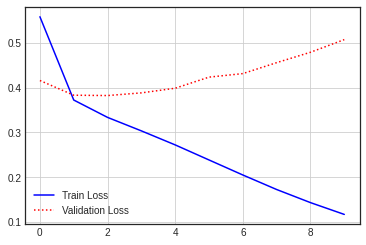

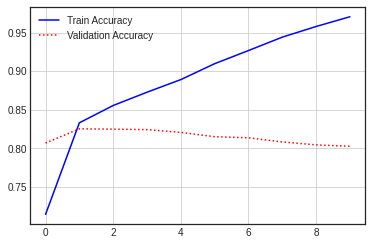

In [14]:
# 시각화
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

hist_dict = history.history

plt.plot(hist_dict['loss'], 'b-', label='Train Loss')
plt.plot(hist_dict['val_loss'], 'r:', label='Validation Loss')
plt.legend()
plt.grid()

plt.figure()
plt.plot(hist_dict['accuracy'], 'b-', label='Train Accuracy')
plt.plot(hist_dict['val_accuracy'], 'r:', label='Validation Accuracy')
plt.legend()
plt.grid()


[과제] imdb 데이터 셋을 가져와서 다음 사항을 기준으로 감정분석을 수행하세요.
- num_words = 2000, max_len=400